#                 **EXPLORATORY DATA ANALYSIS (EDA)**







**DATASET**:  Cardiotocographic.csv




**GOAL**:  

Take a deep dive into the dataset to understand what the variables are saying, spot any issues, and uncover patterns that might tell us more about fetal health







**1:             GETTING STARTED : LOADING THE DATA**





I began by loading the dataset and importing the necessary libraries. A quick .head() aids in the structure's preview.

In [3]:
# 1) LOADING THE DATA

# basic libraries for handling data and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset
df = pd.read_csv("Cardiotocographic.csv")

# Showing the first few rows to get a quick idea of the dataset
print("First 5 rows of the dataset:\n", df.head())


First 5 rows of the dataset:
            LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  


Everything loaded smoothly. Some of the variables we'll be examining are already apparent to me.

2:   CHECKING FOR ISSUES LIKE MISSING VALUES & DATA TYPES

In [4]:
# 2) CHECKING FOR ISSUES LIKE MISSING VALUES & DATA TYPES

# Check for any missing values in each column
print("Missing values in each column:\n", df.isnull().sum())

# Show the data types to confirm everything is numeric
print("\nData types of each column:\n", df.dtypes)

# Get basic statistics to spot extreme values or odd ranges
print("\nStatistical summary:\n", df.describe())


# Getting a full summary of all numerical features
# Transposing it to make it easier to read row-wise

print("Transposed summary of stats:\n", df.describe().T)

Missing values in each column:
 LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

Data types of each column:
 LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

Statistical summary:
                 LB           AC           FM           UC           DL  \
count  2105.000000  2106.000000  2126.000000  2126.000000  2126.000000   
mean    133.343598     0.003219     0.009894     0.004391     0.001895   
std      11.270154     0.004391     0.067540     0.003340     0.003343   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.0000

This dataset is suitable for modeling since it does not have any missing values and all its columns are numerical. However, several features (e.g., LB, ASTV, ALTV, Width, and MLTV) show large differences between their maximum values and means, indicating that these features are likely to be skewed and contain extreme outliers. These findings imply that although the data is clean, some preprocessing steps such as transformation, normalization, or outlier treatment may be necessary to ensure that features are evenly weighted and that the model quality is improved.

**3:          WHAT THE NUMBERS TELL US**



This step shows the data as a whole. I switched the summary around so it's easier to see how each variable acts, such as its mean, standard deviation, and extreme values.

In [5]:
# Detailed transposed summary for better readability
print("Transposed statistical summary:\n", df.describe().T)

Transposed statistical summary:
            count        mean        std         min         25%         50%  \
LB        2105.0  133.343598  11.270154   51.842487  126.000000  133.000000   
AC        2106.0    0.003219   0.004391   -0.019284    0.000000    0.001634   
FM        2126.0    0.009894   0.067540   -0.480634    0.000000    0.000000   
UC        2126.0    0.004391   0.003340   -0.014925    0.001851    0.004484   
DL        2126.0    0.001895   0.003343   -0.015393    0.000000    0.000000   
DS        2105.0    0.000003   0.000142   -0.001353    0.000000    0.000000   
DP        2105.0    0.000175   0.000840   -0.005348    0.000000    0.000000   
ASTV      2126.0   46.995984  18.813973  -63.000000   32.000000   49.000000   
MSTV      2126.0    1.364378   1.173632   -6.600000    0.700000    1.200000   
ALTV      2126.0   10.285964  21.205041  -91.000000    0.000000    0.000000   
MLTV      2105.0    8.284887   7.772858  -50.700000    4.600000    7.400000   
Width     2105.0   

Most features have means that are not very high, but their maximum values are much higher. This suggests that there could be spikes in the fetal signal data. The variables ASTV, DL, DS, and ALTV are characterized by a broader range and greater variability, which indicates that these variables may exhibit more significant or medically relevant patterns than the features that are stable.

**4:   VISUALIZATION OF DISTRIBUTIONS & OUTLIERS**





Now the data visualization is what I am interested in. Boxplots give you a quick visual of extreme values, whereas histograms provide insight into the distributions' forms (e.g., normal, skewed).

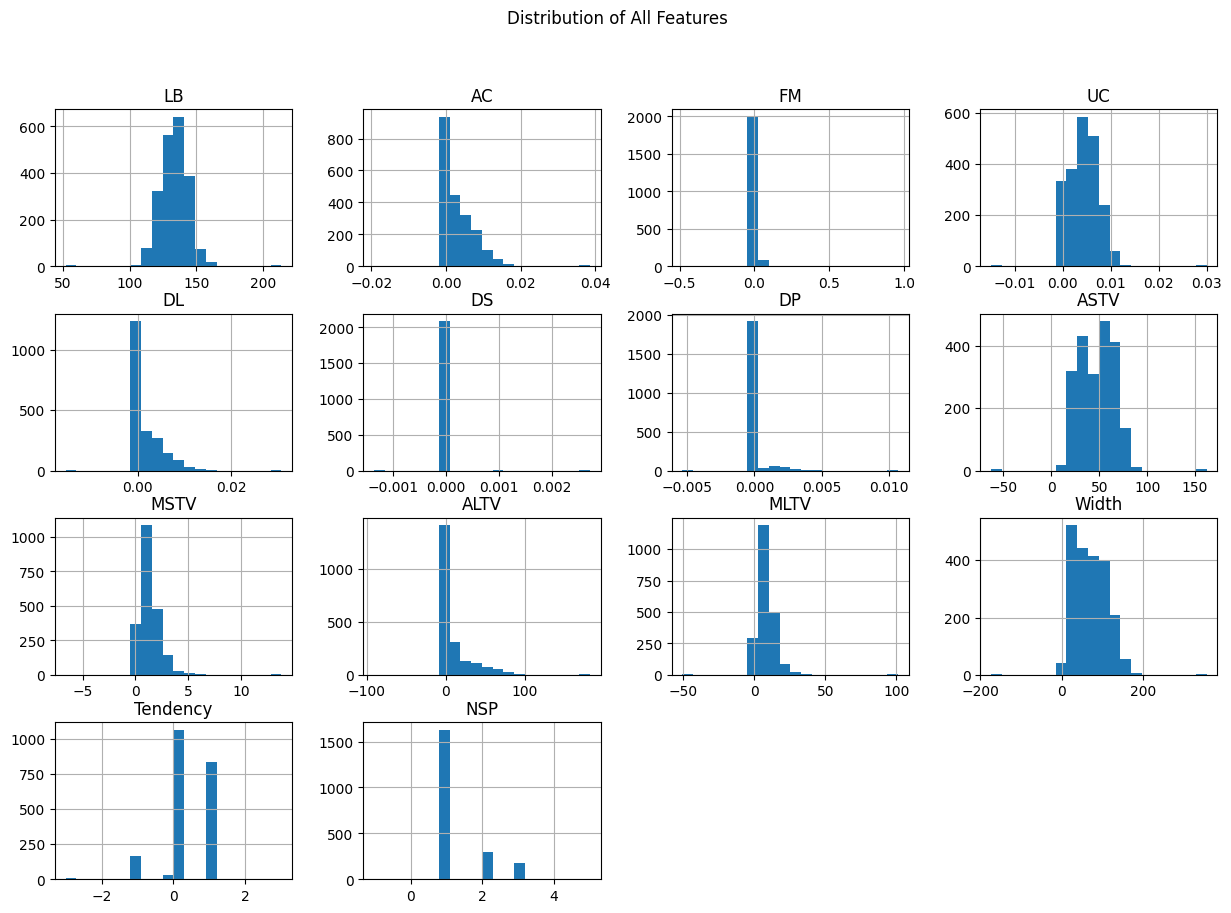

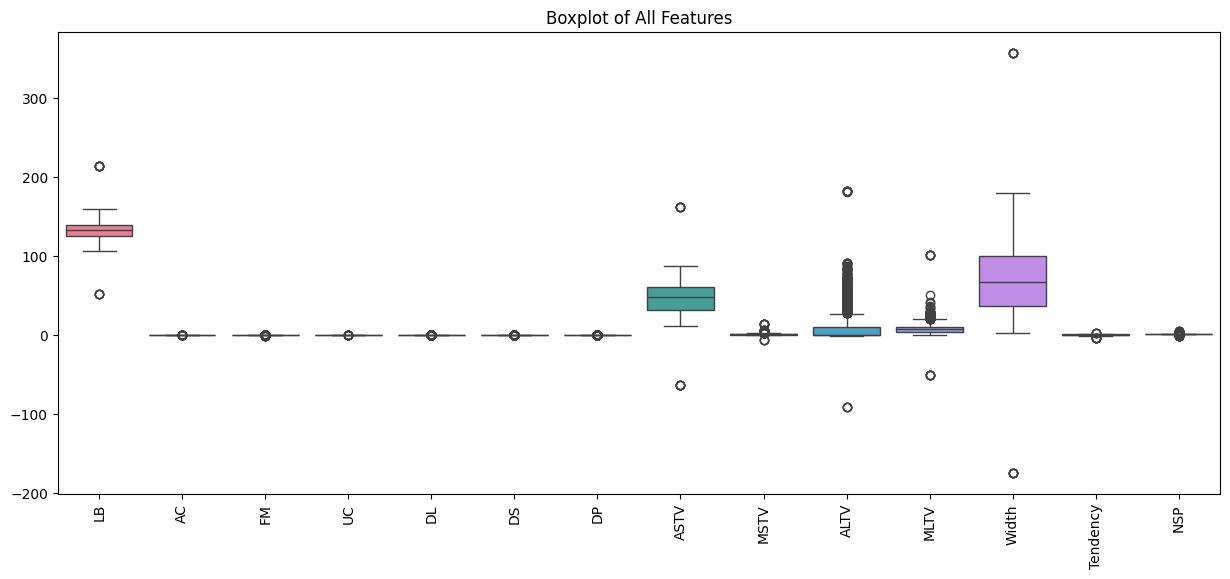

In [6]:
# Plotting  histograms to see distributions
df.hist(figsize=(15, 10), bins=20)
plt.suptitle("Distribution of All Features")
plt.show()

# Plotting boxplots to detect outliers
plt.figure(figsize=(15, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot of All Features")
plt.show()



1. While DL and DS remain heavily concentrated near zero with a few spikes, several features, including ALTV, MLTV, FM, and width, exhibit obvious extreme outliers.





2. The majority of distributions are skewed; some are left-skewed (a few values in Tendency, NSP), some are closer to symmetric (LB, ASTV), and some are right-skewed (AC, DL, DS, ALTV, MLTV, Width).



3. All of these properties such as Width, ALTV, and MLTV have large differences between values and several outliers, whereas the distributions of ASTV and LB look less volatile and show a more even distribution.

**5. HOW DOES THE FEATURE CORRELATION WORK?**



Understanding the interaction between different features is a great advantage. To uncover any influential relationships that could aid in PCA or future predictions, I created a heatmap.

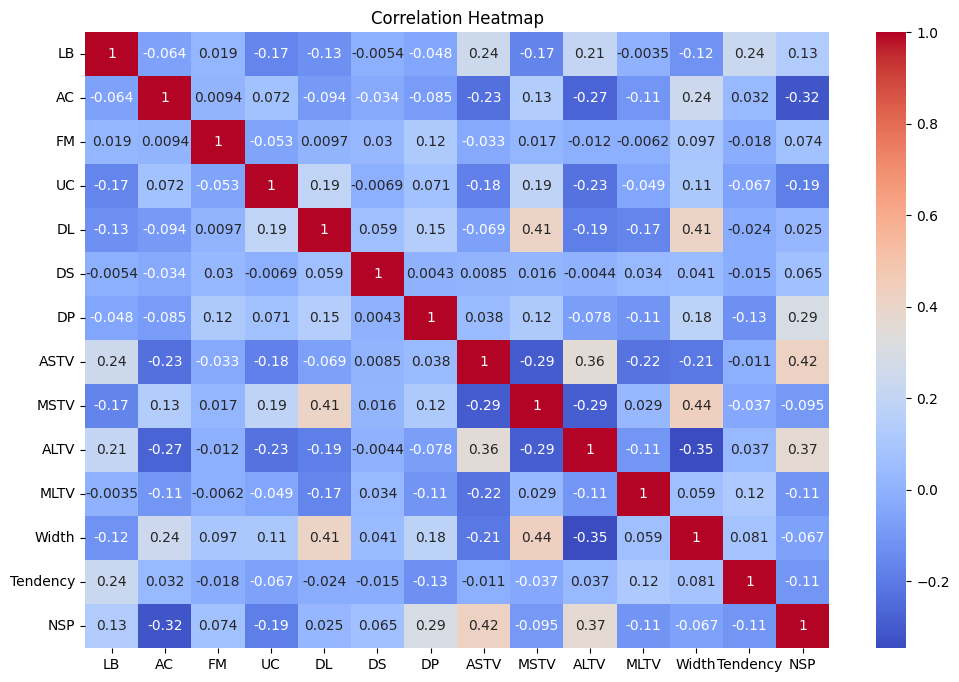

Correlation matrix:
                 LB        AC        FM        UC        DL        DS  \
LB        1.000000 -0.063830  0.018777 -0.166570 -0.126959 -0.005438   
AC       -0.063830  1.000000  0.009433  0.072012 -0.093507 -0.033623   
FM        0.018777  0.009433  1.000000 -0.053226  0.009718  0.029901   
UC       -0.166570  0.072012 -0.053226  1.000000  0.190128 -0.006937   
DL       -0.126959 -0.093507  0.009718  0.190128  1.000000  0.058625   
DS       -0.005438 -0.033623  0.029901 -0.006937  0.058625  1.000000   
DP       -0.047724 -0.084590  0.121284  0.070658  0.145425  0.004285   
ASTV      0.242625 -0.231103 -0.032691 -0.181161 -0.069361  0.008452   
MSTV     -0.170473  0.134168  0.017055  0.189406  0.410102  0.016163   
ALTV      0.210728 -0.271390 -0.011936 -0.227304 -0.186967 -0.004398   
MLTV     -0.003457 -0.106529 -0.006237 -0.049460 -0.165750  0.034349   
Width    -0.118425  0.238436  0.097213  0.107397  0.410031  0.040832   
Tendency  0.236864  0.032481 -0.018339 -0.0

In [7]:
# Correlation matrix visualization
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Also printing correlation values
print("Correlation matrix:\n", df.corr())

The correlation analysis shows that most variables are weakly related, which is common in medical datasets. However, a few stronger patterns stand out: ASTV and ALTV are strongly positively correlated, reflecting their measurement of related fetal signal patterns; UC and DL show moderate correlation, suggesting uterine contractions may influence decelerations; and NSP has moderate associations with ASTV, ALTV, and DP, indicating these features could be important predictors of the target outcome.

**6:                        PAIRPLOTS & VIOLIN PLOTS**  





I plotted a violin plot to check shape + spread for ASTV and a pairplot (for six features) to investigate interactions between particular variables.

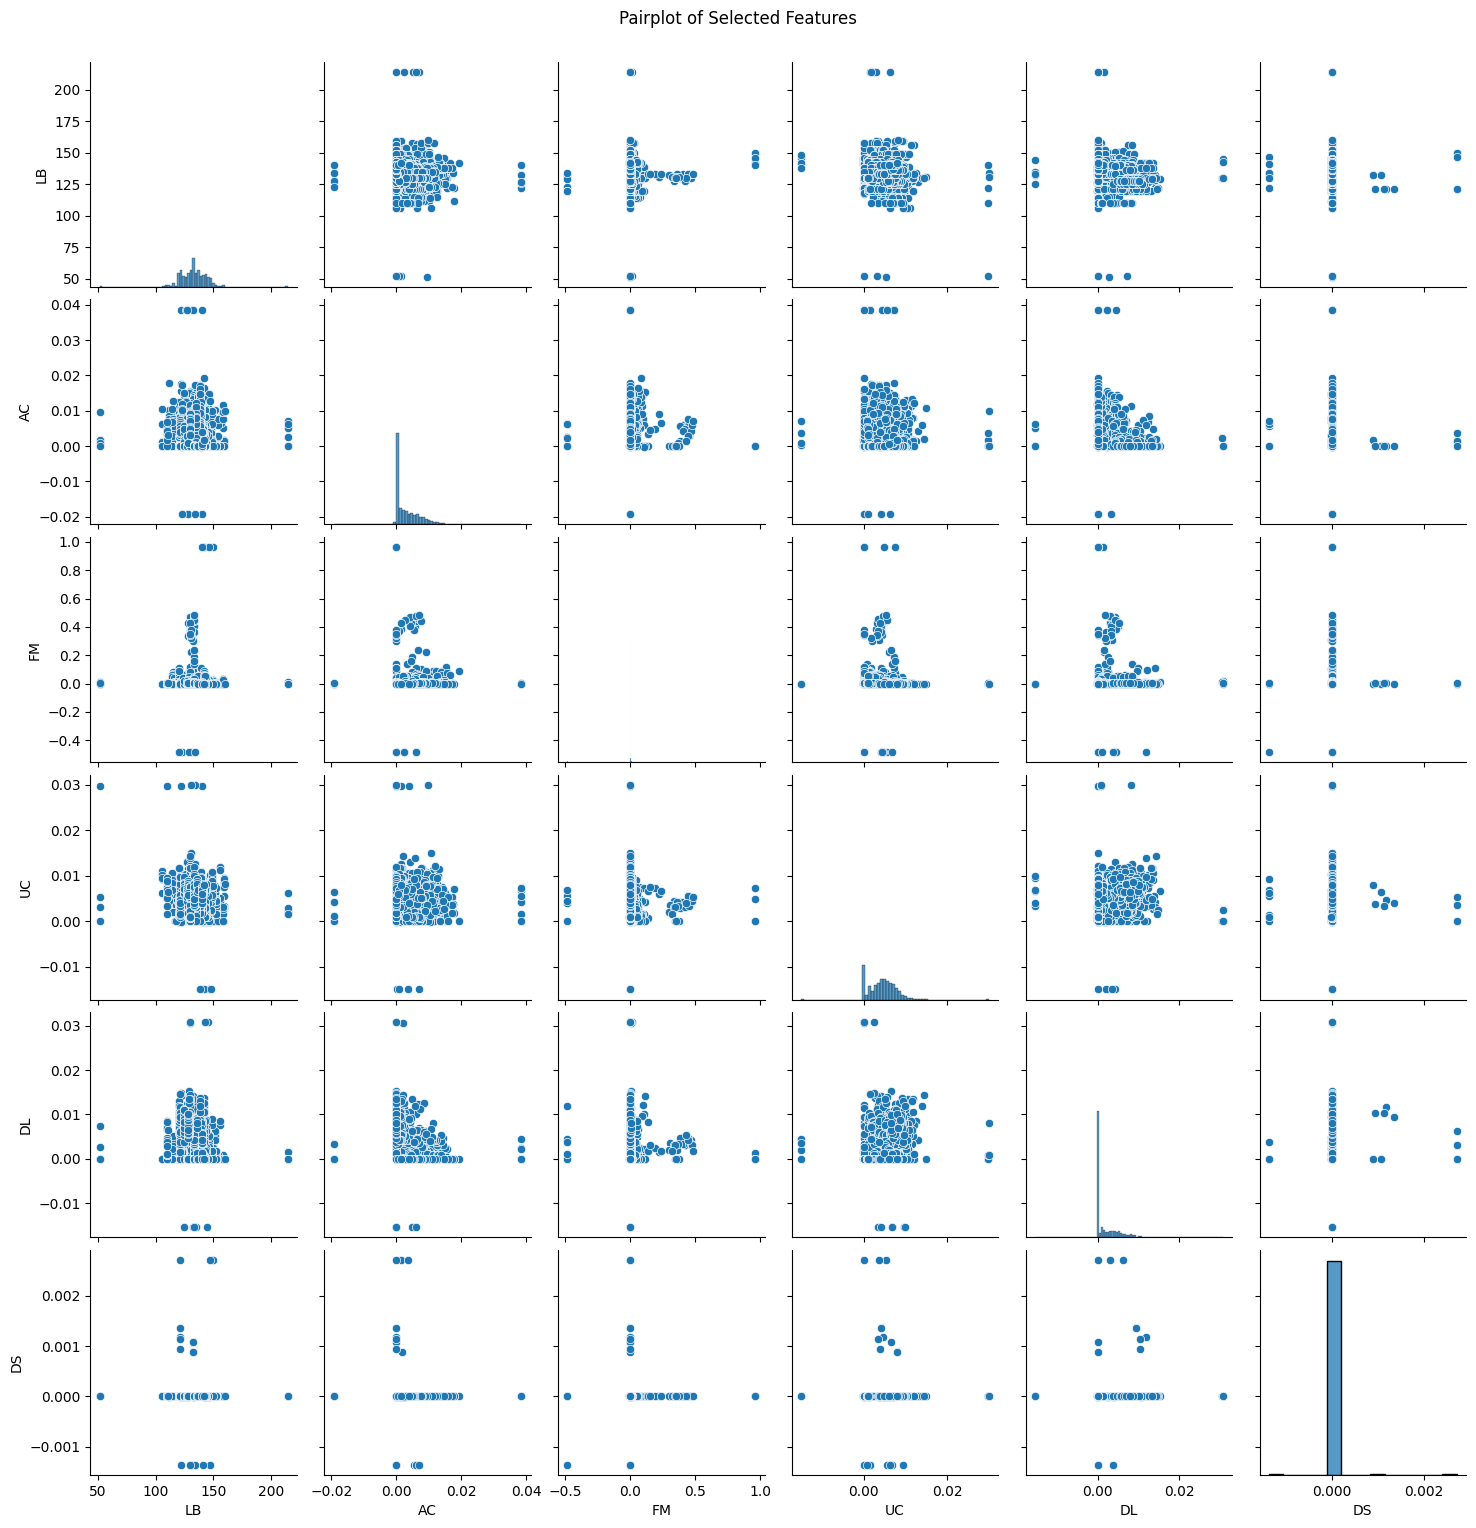

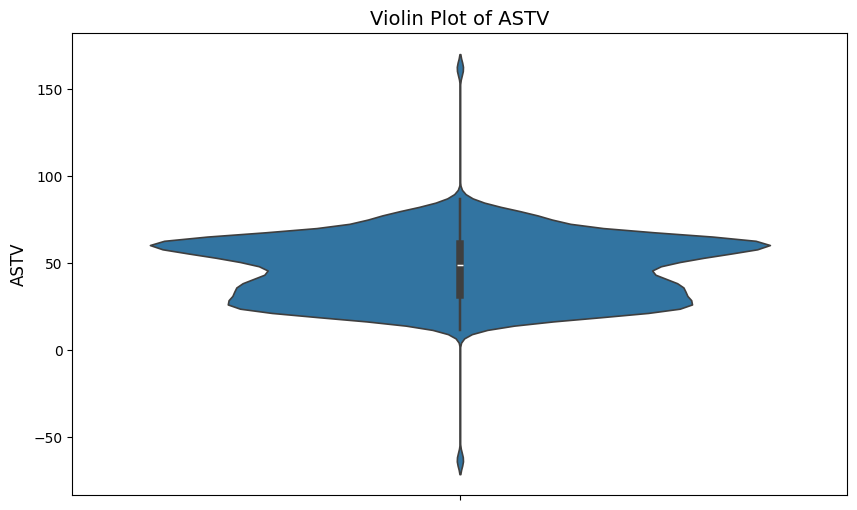

In [8]:
# Pairplot of selected features (first 6)
sns.pairplot(df.iloc[:, :6])
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

# Violin plot for ASTV
plt.figure(figsize=(10, 6))
sns.violinplot(y=df['ASTV'], inner='box', linewidth=1.2)
plt.title("Violin Plot of ASTV", fontsize=14)
plt.ylabel("ASTV", fontsize=12)
plt.show()

The first six features in the pairplot exhibit overlaps and clustering, which could offer helpful separation patterns for classification. The reliability of the data pattern is further supported by the violin plot of ASTV, which shows a concentrated distribution with light tails around the middle values, in line with previous histogram and boxplot findings. corresponds to what we observed in the boxplot and histogram.

**7:                    QUICK INSIGHTS**



After exploring the data using both statistical summaries and visuals, here what I noticed:



The dataset does not contain missing values. As a result of the strong correlation between ASTV and ALTV, these features could be considered as two aspects of the same phenomenon of fetal activity. However, features such as ASTV, DL, and DS not only show a significant range of variation but also have several extreme values. In such a situation, if models based on the normality assumption are used, it becomes very important to be aware that most features are different from the normal distribution.





**8:                                      FINAL THOUGHTS**





I was able to get a good sense of the dataset and potential future developments thanks to this EDA.





This dataset is structured in a very clean way: all numeric values, with no nulls and no strange things that need to be fixed in order to perform the modeling.

Variables correlation, variables stability and variability are now clear to me among the dataset.

 It looks like the data has been set up for the next step, which might be uncovering risk factors via more detailed statistical tests or classifier training.